## BEGIN INSTALLING NECESSARY PACKAGES

In [1]:
!pip install tensorflow==2.10.1

In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Pandas: 1.5.3
Numpy: 1.23.5
Sklearn: 1.2.2
Matplotlib: 3.7.1
Keras: 2.10.0


In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Importing Dataset, the heart disease dataset has in total 76 attributes out of which we will use the main 14 attributes as mentioned in the dataset by Cleveland Clinic Foundation

**Number of instance**: 302

**Number of attributes**: 14 continuous attributes

**Each of a ttributes**:
  
 **age**: Age in years
  
  **sex**: Sex(1 = male, 0 = female)
  
 **cp**: Chest pain type (Value 1: typical angina, Value 2: atypical angina,
  Value 3: non-aginal pain, Value 4: asymptomatic
  
  **trestbps**: Resting blood pressure (in mmHg on admission to hospital)
  
  **chol**: Serum Cholestrol in mg/dl
  
  **fbs**: fast blood sugar > 120 mg/dl (1 = true, 0 = false)
  
  **restecg**: Resting electrocardiographic results (0: normal, 1: having ST-T wave
  abnormality (T-wave inversions and/or St elevation or depression of > 0.
  05mV), 2: showing probable or definite left ventricular hypertrophy by Estes'
  criteria)
  
  **thalach**: Maximum heart rate achieved
  
  **exang**: Exercise included angina (1=yes, 0=no)
  
  **oldpeak**: ST depression indiced by exercise relative to rest
  
  **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2:
  flat, Value 3: downsloping)
  
  **ca** : Number of major vessels (0-3) colored by flourosopy
  
  **thal**: 3 =  normal, 6 = fixed defect, 7 = reversable defect
  
  **HeartDisease**: Diagnosis of heart disease- angiprahic disease status(Value 0:
  < 50% diameter narrowing, Value 1: > 50% diameter narrowing) in any major
  vessel: attributes 59 through 68 are vessels

## IMPORTING DATASET IN OUR CODE

In [4]:
#importing the heart disease dataset from uci repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

#the names will be the attributes of each column in our pandas dataframe

names = ['age',
         'sex',
         'cp',
         'trestbps',
         'chol',
         'fbs',
         'restecg',
         'thalac',
         'exang',
         'oldpeak',
         'slope',
         'ca',
         'thal',
         'class']

#read the csv file
cleveland = pd.read_csv(url, names=names)

In [5]:
#print the DataFrame, so we can see how many exmaples we have
print('Shape of DataFrame: {}'.format(cleveland.shape))
print(cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalac      108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


## HANDLING MISSING DATA

Now we will extract the data for the last 23 patients and examine their details and also handle the missing data

In [6]:
#removing missing data that are present as "?"
data = cleveland[~cleveland.isin(['?'])]
print(data.loc[280:])

      age  sex   cp  trestbps   chol  fbs  restecg  thalac  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0   143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0   179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0   130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0   174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0   161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0   140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0   146.0    1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0   144.0    0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0   163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0   169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0   150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0   166.0    0.

In [7]:
#drop rows with NaN values from the Data frame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [8]:
#print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalac      float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


Now we convert the object datatypes into numeric data for further data analysis

In [9]:
#transforming data to numeric
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalac      float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [10]:
#describing the data chracteristics using built-in function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


If all the data is numeric then it is best for the regression problem, and good for machine learning algorithm.

However, in this project it is a classification problem, and hence we use a neural network to determine the artery disease

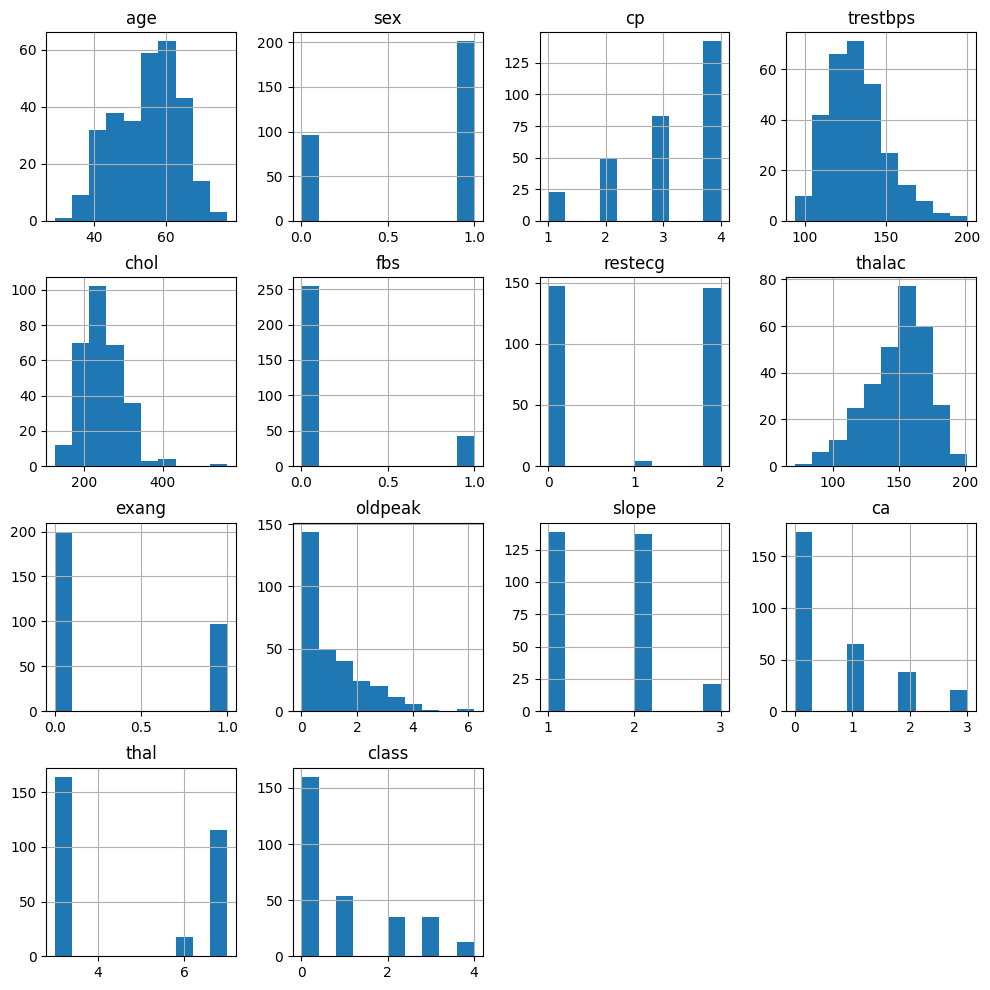

In [11]:
#plotting a histogram for the above data
data.hist(figsize = (12,12))
plt.show()

Class value with O means no heart disease and less number of people have heart disease

## DATA SPLIT INTO TRAINING AND TESTING

NOW CREATING TRAINING AND TESTING DATASET FROM THE ABOVE DATA

We will use sklearn train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data)

The class values in the dataset contains multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). We need to convert this class data to categorical labels. For instance, the label 2 will become [0,0,1,0,0]

In [12]:
# X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], 1)) #drop class column
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

<ipython-input-12-fed84b8a2960>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['class'], 1)) #drop class column


In [13]:
pip install np_utils

In [14]:
#convert data into categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes = None)
print(Y_train.shape)
print(Y_train[:10])

#we have 237 patients in the dataset, out of which 10 are listed according to their heart disease severeness from 0 to 4

(237, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


## BUILDING A NEURAL NETWORK

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#we define a function to build the keras neural network

def create_model():

  model = Sequential()
  model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(4, kernel_initializer='normal', activation='relu'))
  model.add(Dense(5, activation='softmax'))

  # compile model
  adam = Adam(lr=0.001) # lr = Learning rate
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Further we fit the buit model to the training data we split in the beginning

In [16]:
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
24/24 [==============================] - 1s 1ms/step - loss: 1.4211 - accuracy: 0.5148
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3833 - accuracy: 0.5148
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3691 - accuracy: 0.5148
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3573 - accuracy: 0.5148
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3365 - accuracy: 0.5148
Epoch 6/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3384 - accuracy: 0.5148
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3223 - accuracy: 0.5148
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 1.3009 - accuracy: 0.5148
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 1.2908 - accuracy: 0.5148
Epoch 10/150
24/24 [==============================] - 0s 1ms/step - loss: 1.2838 - accuracy: 0.5148
Epoch 11/

As we can observe the categorical data has much loss and less accuracy as well, so now to improve the model, we will proceed to convert the categorical data into binary classification, that is, if the person is having a heart disease or no heart disease.

In [17]:
# converting categorical into binary classification problem
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:10])

[0 0 0 0 1 1 0 0 0 1]


So now, as we can see the heart disease detection is either 0 or 1, meaning if binary value is 0 then no risk of heart disease whereas if binary value is 1 then there is a risk of heart disease.

Hence now we can improve the neural network we built earlier, by again creating a new binary model.

In [18]:
#this model is for binary classification problem
def create_binary_model():

  model = Sequential()
  model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(4, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  adam = Adam(lr=0.001) # lr = Learning rate
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


The last row in the above result under Output Shape, shows (None, 1) where '1' can be '1' or '0' only, as binary output

In [19]:
#fitting the binary model to the above training data

binary_model.fit(X_train, Y_train_binary, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
24/24 [==============================] - 1s 4ms/step - loss: 0.7013 - accuracy: 0.5781
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6582
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6034
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7300
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.6878
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7046
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.6920
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7089
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7384
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7511
Epoch 11/

We can observe the improvement in the binary neural network model, where accuracy has improved as well as the loss is less in comparison to the standard categorical model built earlier.


## ACTUAL PREDICTION and CONCLUSION

In [20]:
#generate classification report using prediction for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for the Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 4ms/step
Results for the Categorical Model
0.6166666666666667
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         7
           3       0.18      1.00      0.31         4
           4       0.00      0.00      0.00         2

    accuracy                           0.62        60
   macro avg       0.22      0.37      0.24        60
weighted avg       0.59      0.62      0.59        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#generate classification report using prediction for binary model

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for the Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 4ms/step
Results for the Binary Model
0.8
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        38
           1       0.67      0.91      0.77        22

    accuracy                           0.80        60
   macro avg       0.80      0.82      0.80        60
weighted avg       0.84      0.80      0.80        60



In conclusion, we can observe the binary model gave us an accuracy of 80% in prediction of heart disease in comparison to the categorical classification model which had an accuracy of 61%.